# Segmentação de imagem

## Preparando ambiente

In [1]:
install.packages('OpenImageR')
require(OpenImageR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘shiny’, ‘jpeg’, ‘png’, ‘tiff’, ‘RcppArmadillo’


Loading required package: OpenImageR



In [2]:
install.packages('raster')
require(raster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Loading required package: raster

Loading required package: sp



In [3]:
install.packages('rgdal')
require(rgdal)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rgdal

Please note that rgdal will be retired by the end of 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.

rgdal: version: 1.5-27, (SVN revision 1148)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
Path to GDAL shared files: /usr/share/gdal/2.2
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
Path to PROJ shared files: (autodetected)
Linking to sp version:1.4-5



In [4]:
install.packages('dplyr')
require(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:raster’:

    intersect, select, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Área de interesse

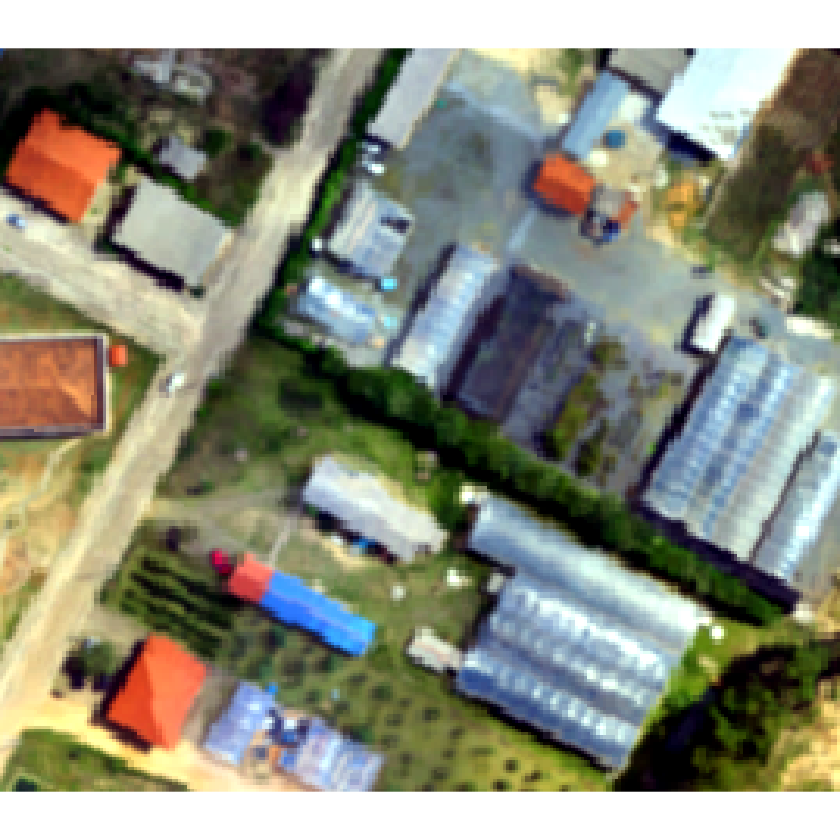

In [5]:
areaImage = brick('cipef_50cm_v2.tif')
nrows = areaImage@nrows
ncols = areaImage@ncols

plotRGB(areaImage, r = 1, g = 2, b = 3, stretch = 'lin')

In [6]:
jpeg('colorImage.jpg', width = ncols, height = nrows)
plotRGB(areaImage, r = 1, g = 2, b = 3, stretch = 'lin')
dev.off()

png 
  2

In [7]:
colorImage = readImage('colorImage.jpg')
Region.slic = superpixels(input_image = colorImage, 
  method = 'slic', superpixel = 60,
  compactness = 30, return_slic_data = TRUE,
  return_labels = TRUE, write_slic = '',
  verbose = FALSE)

Warning message in interface_superpixels(input_image, method, superpixel, compactness, :
“The input data has values between 0.000000 and 1.000000. The image-data will be multiplied by the value: 255!”


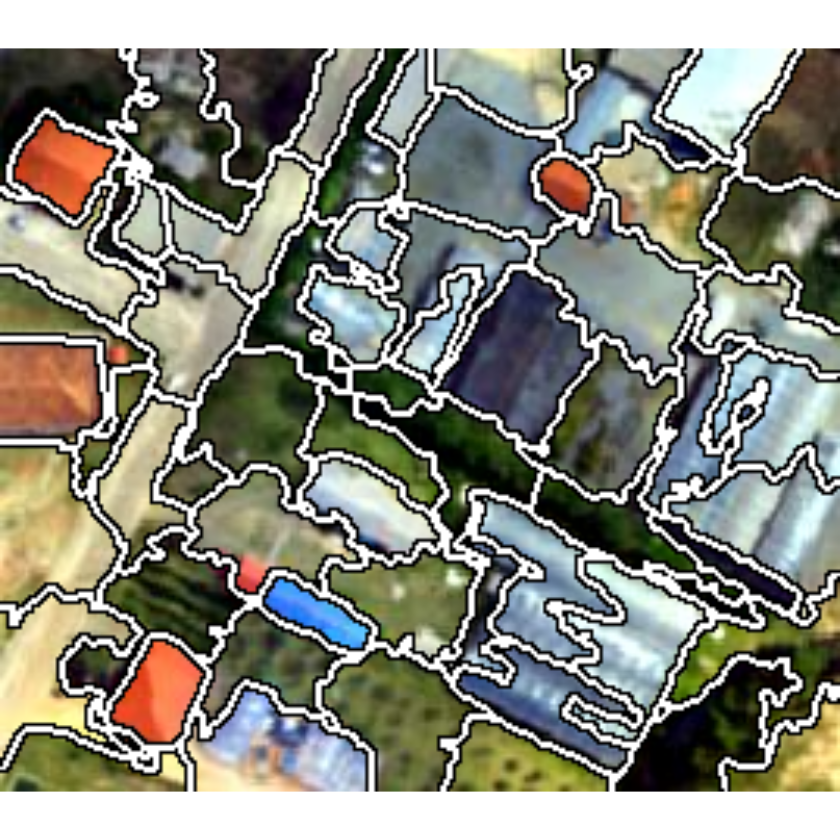

In [8]:
imageShow(Region.slic$slic_data)